# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Incorportaed datetime to determine the date of analysis
import datetime
today = datetime.date.today()

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'There is {len(cities)} in the location.')


There is 617 in the location.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
# The total number of sets needed
total_set_num = (len(cities) // 50) + 1

# Lists for the dataframe
city = []
lat = []
lon = []
city = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
failed_counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric&q="

# cities weather record info
print('Beginning Data Retrieval')
print('-----------------------------')

for set_counter in range(total_set_num):
    
    # try will avoid record breaking if the set doesnt have 50 processing records
    try:    
        # record counter in range 
        for record_counter in range(50):
            
            # extracting the within the list of cities
            counter = set_counter * 50 + record_counter
            
            print(f'Processing Record {record_counter + 1} of Set {set_counter + 1} | {cities[counter]}')

            try:
                
                # query url 
                query_url = url + cities[counter]
                weather_json = requests.get(query_url, time.sleep(1)).json()
                
                # Append lists of the columns
                lat.append(weather_json["coord"]["lat"])
                lon.append(weather_json["coord"]["lon"])
                max_temp.append(weather_json["main"]["temp_max"])
                humidity.append(weather_json["main"]["humidity"])
                cloudiness.append(weather_json["clouds"]["all"])
                wind_speed.append(weather_json["wind"]["speed"])
                country.append(weather_json["sys"]["country"])
                date.append(weather_json["dt"])
                city.append(cities[counter])
            
            # print 'city not found' to the failed counter 
            except KeyError:

                print('City not found. Skipping...')
                failed_counter += 1
            
            # Other errors, print unexpected error
            except:
                
                print('Unexpected Error')
    
    # loop once the IndexError was found
    except IndexError:
        
        break
        
# Print cities found and cities not found
print('-----------------------------')
print(f'There are {failed_counter} cities not found. {len(cities) - failed_counter} cities in dataframe.')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | cockburn town
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | bathsheba
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | umm kaddadah
Processing Record 9 of Set 1 | pucara
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | lachhmangarh
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | popondetta
Processing Record 14 of Set 1 | boguchany
Processing Record 15 of Set 1 | beysehir
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | berlevag
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | narsaq
Processing Record 21 of Set 1 | portland
Processing Record 22 of Set 1 | qostanay
Processing Record 23 of Set 1 | la

Processing Record 39 of Set 4 | alice springs
Processing Record 40 of Set 4 | toronto
Processing Record 41 of Set 4 | boma
Processing Record 42 of Set 4 | sitka
Processing Record 43 of Set 4 | airai
Processing Record 44 of Set 4 | sirnak
Processing Record 45 of Set 4 | moree
Processing Record 46 of Set 4 | mao
Processing Record 47 of Set 4 | paamiut
Processing Record 48 of Set 4 | zhuozhou
City not found. Skipping...
Processing Record 49 of Set 4 | puerto maldonado
Processing Record 50 of Set 4 | bandarbeyla
Processing Record 1 of Set 5 | krasnoselkup
Processing Record 2 of Set 5 | guarapari
Processing Record 3 of Set 5 | severnyy-kospashskiy
Processing Record 4 of Set 5 | almeirim
Processing Record 5 of Set 5 | mezen
Processing Record 6 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 7 of Set 5 | penalva
Processing Record 8 of Set 5 | comodoro rivadavia
Processing Record 9 of Set 5 | kruisfontein
Processing Record 10 of Set 5 | frontera
Processing Record 11 of Set

Processing Record 27 of Set 8 | sangmelima
Processing Record 28 of Set 8 | igarka
Processing Record 29 of Set 8 | khasan
Processing Record 30 of Set 8 | tabuk
Processing Record 31 of Set 8 | aguimes
Processing Record 32 of Set 8 | jahrom
City not found. Skipping...
Processing Record 33 of Set 8 | bilibino
Processing Record 34 of Set 8 | hargeysa
Processing Record 35 of Set 8 | vao
Processing Record 36 of Set 8 | faanui
Processing Record 37 of Set 8 | gamba
Processing Record 38 of Set 8 | lodja
Processing Record 39 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 40 of Set 8 | salinopolis
Processing Record 41 of Set 8 | lianzhou
Processing Record 42 of Set 8 | peruibe
Processing Record 43 of Set 8 | geraldton
Processing Record 44 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 45 of Set 8 | viedma
Processing Record 46 of Set 8 | longyearbyen
Processing Record 47 of Set 8 | hasaki
Processing Record 48 of Set 8 | bodden town
Processing Record 49 of Set 8

Processing Record 17 of Set 12 | point pedro
Processing Record 18 of Set 12 | diamantino
Processing Record 19 of Set 12 | lasa
Processing Record 20 of Set 12 | zhaozhou
Processing Record 21 of Set 12 | sarkand
Processing Record 22 of Set 12 | ijaki
City not found. Skipping...
Processing Record 23 of Set 12 | kasongo-lunda
Processing Record 24 of Set 12 | hornepayne
Processing Record 25 of Set 12 | teguldet
Processing Record 26 of Set 12 | sainte-rose
Processing Record 27 of Set 12 | sataua
City not found. Skipping...
Processing Record 28 of Set 12 | oxbow
Processing Record 29 of Set 12 | sola
Processing Record 30 of Set 12 | nueva guinea
Processing Record 31 of Set 12 | aksarka
Processing Record 32 of Set 12 | yumen
Processing Record 33 of Set 12 | broome
Processing Record 34 of Set 12 | camapua
Processing Record 35 of Set 12 | aklavik
Processing Record 36 of Set 12 | dali
Processing Record 37 of Set 12 | zahnitkiv
Processing Record 38 of Set 12 | meyungs
City not found. Skipping...
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
# Generate dataframe of lists from last cell
cities_dict = {'City': city,
               'Latitude' : lat,
               'Longitude' : lon,
               'Max Temperature (°C)': max_temp,
               'Humidity (%)': humidity,
               'Cloudiness (%)': cloudiness,
               'Wind Speed (MPH)': wind_speed,
               'Country': country,
               'Date': date
              }
cities_df = pd.DataFrame(cities_dict)

# Send dataframe to a csv file
csv_path = 'output_data/cities.csv'
cities_df.to_csv(csv_path)

# Display the dataframe
cities_df

,City,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,cockburn town,21.4612,-71.1419,28.14,79,2,8.84,TC,1658863328
1,upernavik,72.7868,-56.1549,3.63,89,100,5.13,GL,1658863132
2,bluff,-46.6000,168.3333,7.11,89,100,10.04,NZ,1658863331
3,albany,42.6001,-73.9662,25.20,52,100,3.58,US,1658863276
4,bathsheba,13.2167,-59.5167,30.34,76,20,9.26,BB,1658863333
...,...,...,...,...,...,...,...,...,...
562,catuday,16.2923,119.8062,26.56,81,100,2.85,PH,1658864091
563,kavaratti,10.5669,72.6420,27.21,78,100,7.77,IN,1658863993
564,bilma,18.6853,12.9164,34.50,11,32,3.02,NE,1658864095
565,elizabeth city,36.2946,-76.2511,28.01,88,75,15.95,US,1658864096


In [36]:
# Display statistics on the dataframe
cities_df.describe()

,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,19.943493,17.299913,20.991746,71.511464,56.830688,3.620617,1.658864e+09
std,33.516220,89.363661,7.844866,21.409670,39.491193,2.417499,2.511244e+02
min,-54.800000,-175.200000,0.750000,8.000000,0.000000,0.000000,1.658863e+09
25%,-6.300800,-60.409550,15.715000,61.000000,13.500000,1.790000,1.658863e+09
50%,21.444700,19.234500,22.030000,77.000000,70.000000,3.100000,1.658864e+09
75%,49.043050,93.604700,26.565000,88.000000,100.000000,4.820000,1.658864e+09
max,78.218600,178.416700,42.380000,100.000000,100.000000,15.950000,1.658864e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
# Skip any row which has a humidity higher than 100%
cleaned_cities_df = cities_df.loc[cities_df['Humidity (%)'] <= 100]
cleaned_cities_df

,City,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,cockburn town,21.4612,-71.1419,28.14,79,2,8.84,TC,1658863328
1,upernavik,72.7868,-56.1549,3.63,89,100,5.13,GL,1658863132
2,bluff,-46.6000,168.3333,7.11,89,100,10.04,NZ,1658863331
3,albany,42.6001,-73.9662,25.20,52,100,3.58,US,1658863276
4,bathsheba,13.2167,-59.5167,30.34,76,20,9.26,BB,1658863333
...,...,...,...,...,...,...,...,...,...
562,catuday,16.2923,119.8062,26.56,81,100,2.85,PH,1658864091
563,kavaratti,10.5669,72.6420,27.21,78,100,7.77,IN,1658863993
564,bilma,18.6853,12.9164,34.50,11,32,3.02,NE,1658864095
565,elizabeth city,36.2946,-76.2511,28.01,88,75,15.95,US,1658864096


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

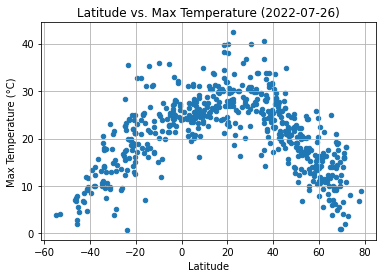

In [38]:
# Plot the scatter plot of latitude and max temperature.
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', 
                       title=f'Latitude vs. Max Temperature ({today})')
plt.grid()
plt.savefig('output_data/Latitude_MaxTemperature_Plot.png')

The plot have shown that the max temperature increases as the latitude of the place approaching the interval of -20 to 20. The higher the latitude, the lower the temperature.

## Latitude vs. Humidity Plot

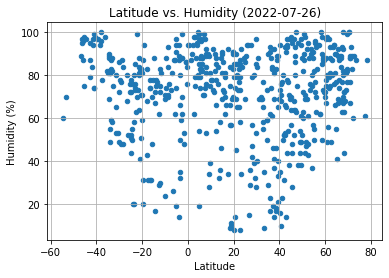

In [39]:
# Plot the scatter plot comparing latitude and humidity.
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', 
                       title=f'Latitude vs. Humidity ({today})')
plt.grid()
plt.savefig('output_data/Latitude_Humidity_Plot.png')

Most of the cities tend to have a humidity above 60%, while the humidity of those cities with latitude between 0 to 40 tends to vary more. Cities with latitude between 40 to 80 often have a humidity between 80% to 100%.

## Latitude vs. Cloudiness Plot

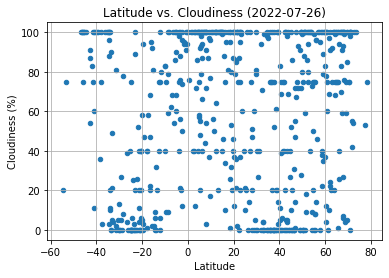

In [40]:
# Plot the scatter plot of latitude and cloudiness.
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', 
                       title=f'Latitude vs. Cloudiness ({today})')
plt.grid()
plt.savefig('output_data/Latitude_Cloudiness_Plot.png')

The cities with latitude 40 to 80 tends to have a cloudiness clustering at 80% to 100%. However, the rest of the data points seem to distributed evenly on the plot. Hence, there isn't much of a correlation between coludiness and latitude. 

## Latitude vs. Wind Speed Plot

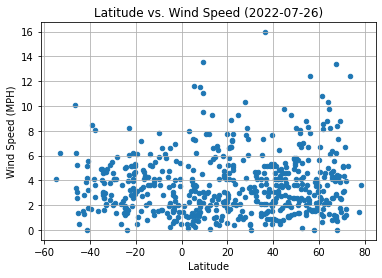

In [41]:
# Plot the scatter plot of latitude and wind speed.
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', 
                       title=f'Latitude vs. Wind Speed ({today})')
plt.grid()
plt.savefig('output_data/Latitude_WindSpeed_Plot.png')

Most of the cities has a wind speed of 0MPH to 8MPH, with some cities at a higher(positive and negative) latitude having higher wind speed.

## Linear Regression

In [42]:
# Dataframe in comparision of north and south cities latitude
north_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] >= 0]
south_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.4825233141324678
The linear regression model is y = -0.25x + 31.78


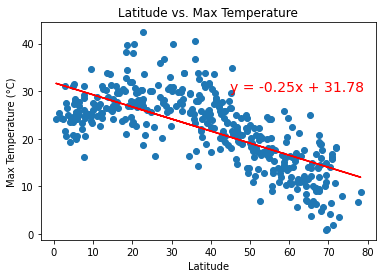

In [43]:
# Plot the linear regression of latitude and max temperature in the northern hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', title='Latitude vs. Max Temperature')

# Linear regression(Northern Hempisphere)print scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Max Temperature (°C)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Max Temperature (°C)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (45, 30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the northern hemisphere, the max temperature decreases while the city is away from 0 degree latitude.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.5741111573896079
The linear regression model is y = 0.44x + 28.06


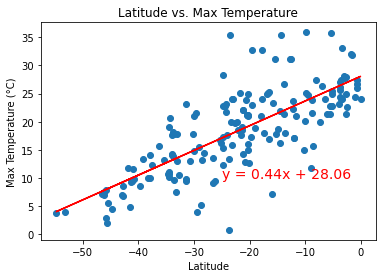

In [44]:
# Plot the linear regression of latitude and max temperature in the southern hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', title='Latitude vs. Max Temperature')

# Linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Max Temperature (°C)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Max Temperature (°C)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the southern hemisphere, the max temperature increases while the city is close to 0 degree latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.0027442033010354116
The linear regression model is y = 0.05x + 69.26


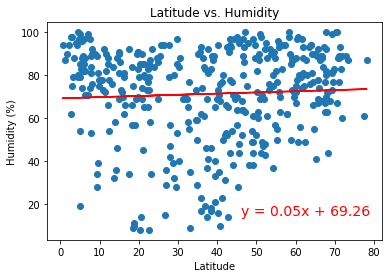

In [45]:
# Plot the linear regression of latitude and humidity of northern hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Latitude vs. Humidity')

# Linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Humidity (%)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Humidity (%)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(46,15),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the northern hemisphere, the humidity increases while the city is away from 0 degree latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.062296837816306655
The linear regression model is y = -0.38x + 63.54


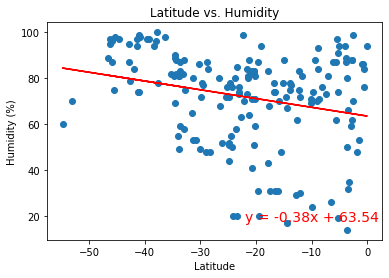

In [46]:
# Plot the linear regression of latitude and humidity in the southern hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Latitude vs. Humidity')

# Linear regression and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Humidity (%)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Humidity (%)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,18),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the southern hemisphere, the humidity slightly increases while the city is close to 0 degree latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.005723469239564634
The linear regression model is y = -0.14x + 65.69


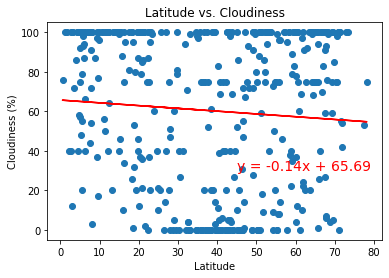

In [47]:
# Plot the linear regression of latitude and cloudiness in the northern hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Latitude vs. Cloudiness')

# Linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Cloudiness (%)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Cloudiness (%)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the northern hemisphere, the cloudiness tend to increase while the city is away from 0 degree latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0026191506650691822
The linear regression model is y = 0.15x + 52.13


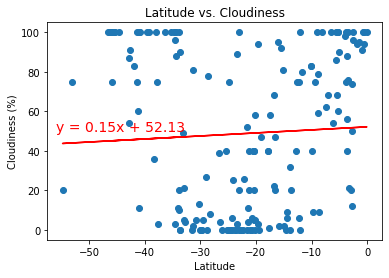

In [48]:
# Plot linear regression model between latitude and cloudiness in the southern hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Latitude vs. Cloudiness')

# Linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Cloudiness (%)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Cloudiness (%)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-56,50),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the southern hemisphere, the cloudiness tend to increases while the city is close to 0 degree latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.0048929900410316345
The linear regression model is y = 0.01x + 3.37


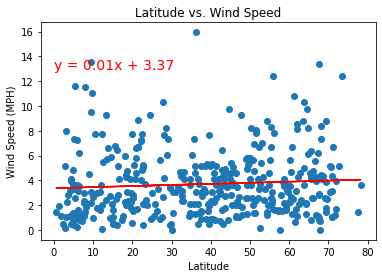

In [49]:
# Plot the linear regression of latitude and wind speed in the northern hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Latitude vs. Wind Speed')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Wind Speed (MPH)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Wind Speed (MPH)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(0,13),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the northern hemisphere, the wind speed is not really affected while the city is away from 0 degree latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.011026736754073172
The linear regression model is y = -0.01x + 3.12


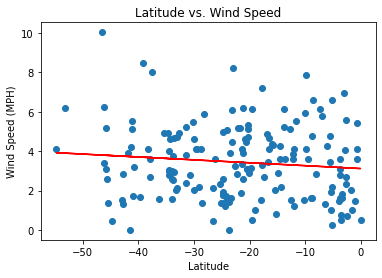

In [50]:
# Plot the linear regression of latitude and wind speed in the southern hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Latitude vs. Wind Speed')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Wind Speed (MPH)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Wind Speed (MPH)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,13),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the southern hemisphere, the wind speed is not really affected(even have a slightly steeper slope) while the city is close to 0 degree latitude.